# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [2]:
from warnings import filterwarnings
filterwarnings(action="ignore")

In [5]:
# Load Training data
data = pd.read_csv("../data/train_data.csv")
data.head()

,MonthlyHour,Type,Amount,SenderBalance,ReceiverBalance,isFraud
0,18,TRANSFER,185179.51,0.00,666160.16,0
1,185,DEBIT,18996.03,534.00,218943.42,0
2,306,PAYMENT,1249.91,101240.78,0.00,0
3,227,CASH_OUT,80870.17,0.00,98974.08,0
4,34,CASH_OUT,30917.39,30917.39,339926.42,1


In [6]:
# Number of Rows and Cols in Data
print("Rows:{}\nCols:{}".format(*data.shape))

Rows:75600
Cols:6


## Basic infos about the dataset

In [7]:
# Memory Usage in megabytes
print(f"Dataset's memory size: {data.memory_usage().sum()/1e6:.1f} MB")

Dataset's memory size: 3.6 MB


In [8]:
# Dataset's Shape & Size
print(f"Number of Columns: {data.shape[1]}")
print(f"Number of Rows(observations): {data.shape[0]}")

print(f"Size: {data.size}")

Number of Columns: 6
Number of Rows(observations): 75600
Size: 453600


In [9]:
# Features(Columns)'s data types
print(data.dtypes)

MonthlyHour          int64
Type                object
Amount             float64
SenderBalance      float64
ReceiverBalance    float64
isFraud              int64
dtype: object


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75600 entries, 0 to 75599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MonthlyHour      75600 non-null  int64  
 1   Type             75600 non-null  object 
 2   Amount           75600 non-null  float64
 3   SenderBalance    75600 non-null  float64
 4   ReceiverBalance  75600 non-null  float64
 5   isFraud          75600 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 3.5+ MB
None


We conclude that:
- It takes only ~4 mb of memory. 
- It is clean.
- It contains 5 Numerical Features and 1 Categorical.

## Univariate Analysis

### Monthly Hour

In [11]:
monthly_hour = data.MonthlyHour
# Data Type
print("Data Type:",monthly_hour.dtype,", Bounded between 0 and 744")

Data Type: int64 , Bounded between 0 and 744


In [12]:
monthly_hour.describe()

count    75600.000000
mean       279.709048
std        176.663143
min          1.000000
25%        158.000000
50%        260.000000
75%        376.000000
max        743.000000
Name: MonthlyHour, dtype: float64

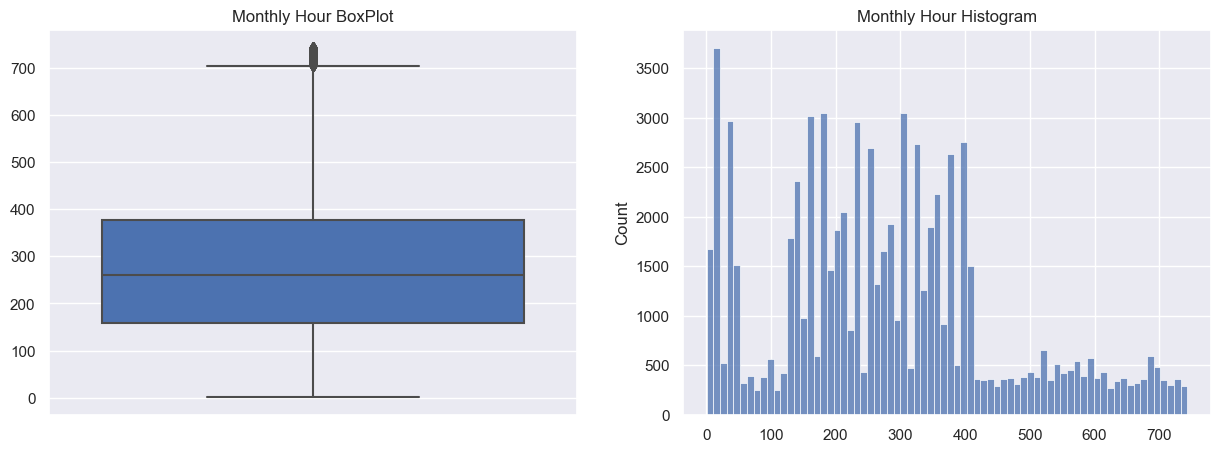

Kurtosis: -0.13786260536653572
Skewness: 0.5465849540976039


In [13]:
# Noisiness and type of noise
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y=monthly_hour.values,ax=axs[0],saturation=1)
sns.histplot(monthly_hour.values,ax=axs[1])
axs[0].set_title("Monthly Hour BoxPlot")
axs[1].set_title("Monthly Hour Histogram")
plt.show()

# Kurtosis & Skewness
print("Kurtosis:",monthly_hour.kurtosis())
print("Skewness:",monthly_hour.skew())

We see that:
- Distribution follows **N~(244,20736)**
- Distribution is **platykurtic**, with thinner tails and fewer outliers.
- Distribution is **skewered to right** so outliers are more in the right side.

In [15]:
Q1 = monthly_hour.quantile(.25)
Q3 = monthly_hour.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 218.0
Upper Bound: 703.0
Lower Bound: -169.0


In [16]:
# Outlier detection Using IQR
iqr_outliers = monthly_hour[(monthly_hour > upper_bound) |  (monthly_hour < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  1250
IQR Outliers:  Index([    5,   347,   429,   441,   466,   489,   609,   628,   651,   655,
       ...
       75281, 75298, 75349, 75382, 75417, 75491, 75509, 75531, 75553, 75583],
      dtype='int64', length=1250)


In [17]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(monthly_hour)
zscore_outliers = monthly_hour[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  0
ZScore Outliers:  Index([], dtype='int64')


We will remove some iqr outliers

In [20]:
# Remove IQR Outliers
data = data[~data.index.isin(np.random.choice(iqr_outliers,size=400))]

In [21]:
# Usefulness for the task
print("Correlation Cofficient: ",round(data.isFraud.corr(monthly_hour)*100,2),"%")

Correlation Cofficient:  32.07 %


The variables are dependent, with relationship 32% between them.<br>
So **Monthly Hour** has a middle impact on the target.

### Type

In [22]:
type = data.Type
# Data Type
print("Data Type:",type.dtype)
# Unique Values
print("Unique Values",type.unique())

Data Type: object
Unique Values ['TRANSFER' 'DEBIT' 'PAYMENT' 'CASH_OUT' 'CASH_IN']


In [23]:
type.describe()

count        75560
unique           5
top       TRANSFER
freq         21597
Name: Type, dtype: object

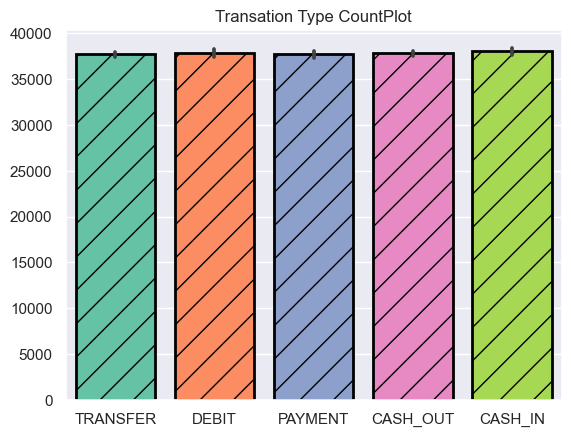

In [24]:
sns.barplot(y=type.index,x=type.values,palette="Set2",saturation=1,lw=2,ec="black",hatch="/")
plt.title("Transation Type CountPlot")
plt.show()

We see that:
- Distribution follows Discrete **U~(0,5)**

from the count plot its obvious there is no outliers.

In [25]:
# Usefulness for the task
print("Correlation Cofficient: ",round(data.isFraud.corr(data.Type.map(dict(zip(data.Type.unique(),range(0,5)))))*100,2),"%")

Correlation Cofficient:  -15.64 %


The variables are small dependent, with -16% relationship between them.<br>
So **Type** has a small impact on the target.

### Amount

In [26]:
amount = data.Amount
# Data Type
print("Data Type:",amount.dtype,", Positive.")

Data Type: float64 , Positive.


In [27]:
amount.describe()

count    7.556000e+04
mean     5.964533e+05
std      1.565088e+06
min      0.000000e+00
25%      1.283995e+04
50%      1.246970e+05
75%      3.989962e+05
max      4.363841e+07
Name: Amount, dtype: float64

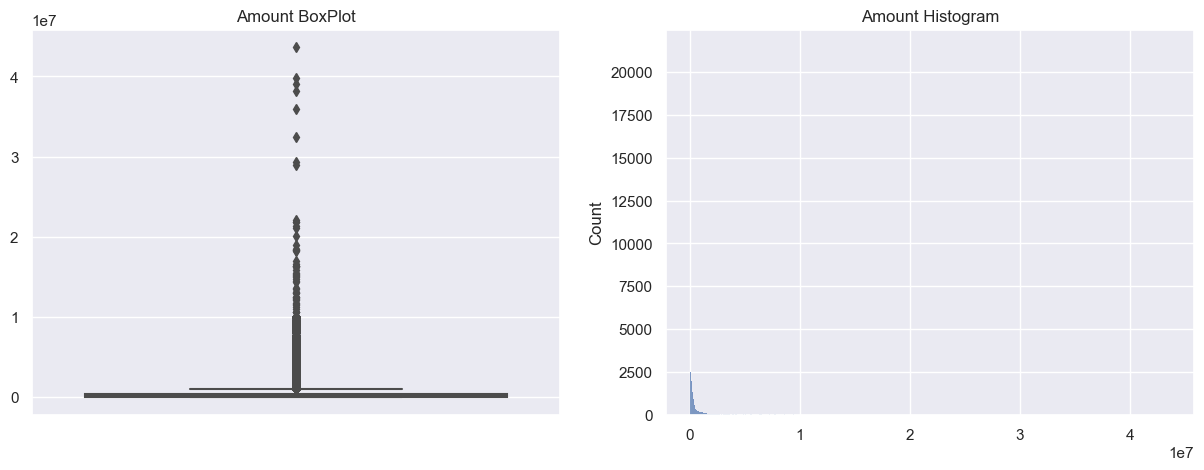

Kurtosis: 54.01287643391305
Skewness: 5.66714473846012


In [28]:
# Noisiness and type of noise
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y=amount.values,ax=axs[0])
sns.histplot(amount.values,ax=axs[1])
axs[0].set_title("Amount BoxPlot")
axs[1].set_title("Amount Histogram")
plt.show()

# Kurtosis & Skewness
print("Kurtosis:",amount.kurtosis())
print("Skewness:",amount.skew())

In [29]:
1/.964533e+05

1.0367711628321685e-05

We see that:
- Distribution follows **Exp~(1e-5)**
- Distribution is **leptokurtic**,with fatter tails and extreme outliers.
- Distribution is **skewered to right** so outliers are too more in the right side.

In [30]:
Q1 = amount.quantile(0.25)
Q3 = amount.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 386156.285
Upper Bound: 978230.6625
Lower Bound: -566394.4775


In [31]:
# Outlier detection Using IQR
iqr_outliers = amount[(amount > upper_bound) |  (amount < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  9943
IQR Outliers:  Index([    5,    11,    13,    18,    28,    31,    36,    38,    43,    50,
       ...
       75557, 75569, 75571, 75578, 75581, 75585, 75593, 75596, 75597, 75599],
      dtype='int64', length=9943)


In [32]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(amount)
zscore_outliers = amount[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  2030
ZScore Outliers:  Index([    5,    36,    43,   150,   213,   254,   280,   303,   308,   321,
       ...
       75155, 75213, 75242, 75248, 75304, 75531, 75534, 75553, 75569, 75571],
      dtype='int64', length=2030)


In [33]:
# Check Shared Outliers Between the Two Methods
outliers = []
for index in iqr_outliers.index:
    if index in zscore_outliers.index:
        outliers.append(index)
print("Number of Shared Outliers: ",zscore_outliers.count())
print("Shared Outliers: ",outliers[:10],"...")

Number of Shared Outliers:  2030
Shared Outliers:  [5, 36, 43, 150, 213, 254, 280, 303, 308, 321] ...


We will remove shared outliers and some of outliers from iqr.

In [34]:
# Remove Shared Outliers
data = data[~data.index.isin(outliers)]

In [35]:
# Remove Some IQR Outliers
data = data[~data.index.isin(np.random.choice(iqr_outliers,size=500))]

In [36]:
# Usefulness for the task
print("Correlation Cofficient: ",round(data.isFraud.corr(amount)*100,2),"%")

Correlation Cofficient:  37.76 %


The variables are dependent, with 38% relationship between them.<br>
So **Ammount** has a middle impact on the target.

### Sender Balance

In [41]:
senderbalance = data.Amount
# Data Type
print("Data Type:",senderbalance.dtype,", Positive.")

Data Type: float64 , Positive.


In [42]:
senderbalance.describe()

count    7.353000e+04
mean     3.759366e+05
std      7.148400e+05
min      0.000000e+00
25%      1.195179e+04
50%      1.158812e+05
75%      3.580258e+05
max      5.274774e+06
Name: Amount, dtype: float64

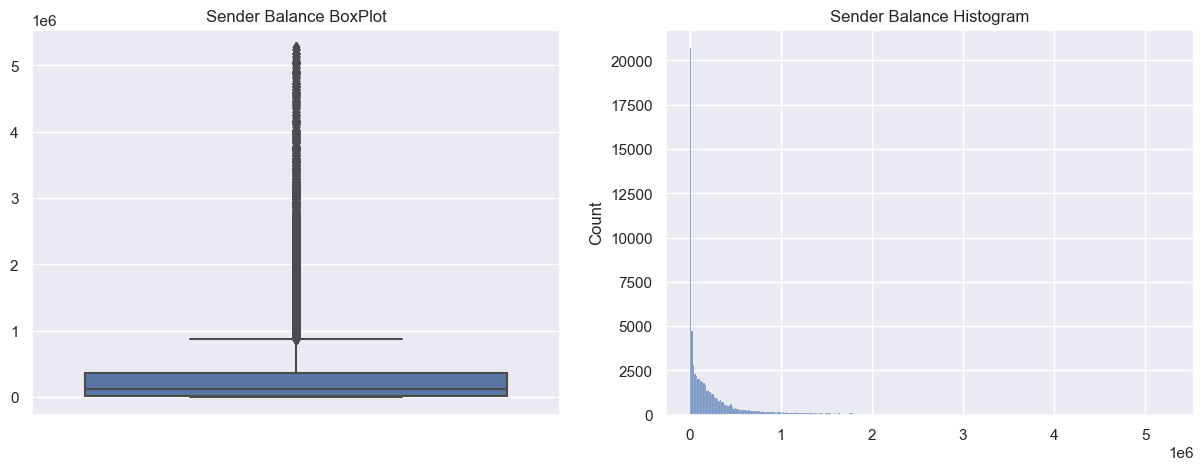

Kurtosis: 13.878685581119923
Skewness: 3.454380842897154


In [43]:
# Noisiness and type of noise
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y=senderbalance.values,ax=axs[0])
sns.histplot(senderbalance.values,ax=axs[1])
axs[0].set_title("Sender Balance BoxPlot")
axs[1].set_title("Sender Balance Histogram")
plt.show()

# Kurtosis & Skewness
print("Kurtosis:",senderbalance.kurtosis())
print("Skewness:",senderbalance.skew())

We see that:
- Distribution follows **Exp~(2.66e-6)**
- Distribution is **leptokurtic**,with fatter tails and extreme outliers.
- Distribution is **skewered to right** so outliers are more in the right side.

In [45]:
Q1 = senderbalance.quantile(0.25)
Q3 = senderbalance.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 346074.0075
Upper Bound: 877136.80875
Lower Bound: -507159.22125


In [46]:
# Outlier detection Using IQR
iqr_outliers = senderbalance[(senderbalance > upper_bound) |  (senderbalance < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  8810
IQR Outliers:  Index([   11,    13,    18,    28,    31,    38,    50,    54,    57,    69,
       ...
       75518, 75532, 75557, 75578, 75581, 75585, 75593, 75596, 75597, 75599],
      dtype='int64', length=8810)


In [47]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(senderbalance)
zscore_outliers = senderbalance[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  2142
ZScore Outliers:  Index([   18,    38,    57,    69,   242,   258,   292,   295,   298,   338,
       ...
       75246, 75288, 75293, 75320, 75375, 75396, 75400, 75487, 75492, 75496],
      dtype='int64', length=2142)


In [48]:
# Check Shared Outliers Between the Two Methods
outliers = []
for index in iqr_outliers.index:
    if index in zscore_outliers.index:
        outliers.append(index)
print("Number of Shared Outliers: ",zscore_outliers.count())
print("Shared Outliers: ",outliers[:10],"...")

Number of Shared Outliers:  2142
Shared Outliers:  [18, 38, 57, 69, 242, 258, 292, 295, 298, 338] ...


We will remove shared outliers.

In [49]:
# Remove Shared Outliers
data = data[~data.index.isin(outliers)]

In [50]:
# Usefulness for the task
print("Correlation Cofficient: ",round(data.isFraud.corr(senderbalance)*100,2),"%")

Correlation Cofficient:  35.35 %


The variables are dependent, with 25% relationship between them.<br>
So **Sender Balance** has a middle impact on the target.

### Receiver Balance

In [71]:
receiverbalance = data.ReceiverBalance
# Data Type
print("Data Type:",receiverbalance.dtype,", Positive.")

Data Type: float64 , Positive.


In [72]:
receiverbalance.describe()

count    7.138800e+04
mean     1.147890e+06
std      3.775298e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.665038e+05
75%      1.006442e+06
max      2.551680e+08
Name: ReceiverBalance, dtype: float64

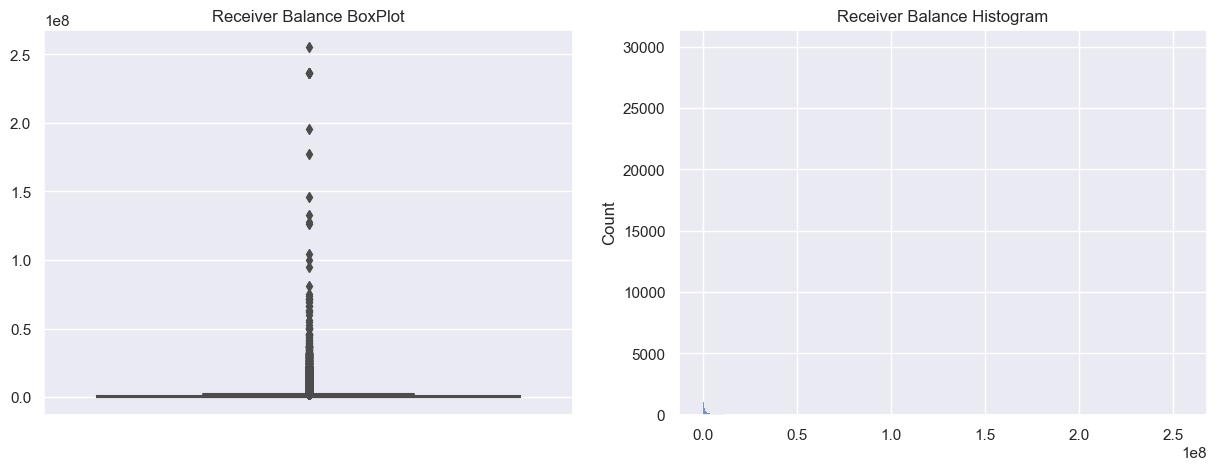

Kurtosis: 1433.0479657618125
Skewness: 27.537043798921093


In [73]:
# Noisiness and type of noise
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y=receiverbalance.values,ax=axs[0])
sns.histplot(receiverbalance.values,ax=axs[1])
axs[0].set_title("Receiver Balance BoxPlot")
axs[1].set_title("Receiver Balance Histogram")
plt.show()

# Kurtosis & Skewness
print("Kurtosis:",receiverbalance.kurtosis())
print("Skewness:",receiverbalance.skew())

We see that:
- Distribution follows **Exp~(8.7e-7)**
- Distribution is **leptokurtic**,with fatter tails and extreme outliers.
- Distribution is **skewered to right** so outliers are more in the right side.

In [75]:
Q1 = receiverbalance.quantile(0.25)
Q3 = receiverbalance.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1006442.23
Upper Bound: 2516105.575
Lower Bound: -1509663.345


In [76]:
# Outlier detection Using IQR
iqr_outliers = receiverbalance[(receiverbalance > upper_bound) |  (receiverbalance < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  8602
IQR Outliers:  Index([    9,    12,    23,    28,    34,    35,    41,    80,    93,   101,
       ...
       75532, 75535, 75539, 75540, 75541, 75547, 75552, 75557, 75578, 75585],
      dtype='int64', length=8602)


In [77]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(receiverbalance)
zscore_outliers = receiverbalance[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  721
ZScore Outliers:  Index([  123,   196,   373,   396,   404,   559,   745,   792,   888,  1295,
       ...
       74155, 74287, 74301, 74635, 74699, 74787, 74925, 74931, 74986, 75066],
      dtype='int64', length=721)


In [78]:
# Check Shared Outliers Between the Two Methods
outliers = []
for index in iqr_outliers.index:
    if index in zscore_outliers.index:
        outliers.append(index)
print("Number of Shared Outliers: ",zscore_outliers.count())
print("Shared Outliers: ",outliers[:10],"...")

Number of Shared Outliers:  721
Shared Outliers:  [123, 196, 373, 396, 404, 559, 745, 792, 888, 1295] ...


We will remove shared outliers

In [79]:
# Remove Shared Outliers
data = data[~data.index.isin(outliers)]

In [80]:
# Usefulness for the task
print("Correlation Cofficient: ",round(data.isFraud.corr(senderbalance)*100,2),"%")

Correlation Cofficient:  35.54 %


The variables are dependent, with 26% relationship between them.<br>
So **Receiver Balance** has a small impact on the target.

### Is Fraud

In [51]:
isfraud = data.isFraud
# Data Type
print("Data Type:",isfraud.dtype,", Binary.")

Data Type: int64 , Binary.


In [52]:
isfraud.describe()

count    71388.000000
mean         0.252269
std          0.434318
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: isFraud, dtype: float64

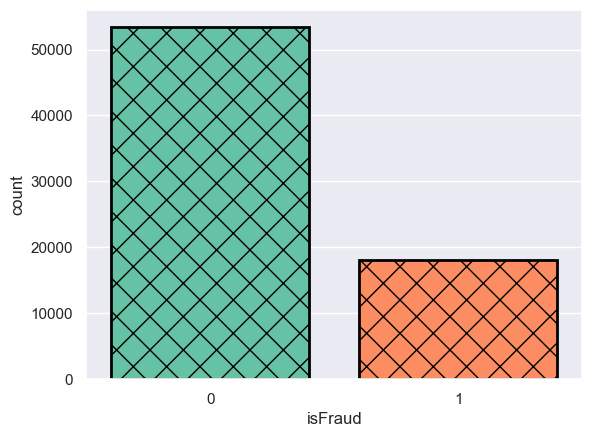

In [55]:
sns.countplot(x=isfraud,palette="Set2",saturation=1,lw=2,ec="black",hatch="X")
plt.show()

We see that:
- Distribution follows **Bern~(0.25)**

## Bivariate Analysis

### **Type** with **Monthly Hour**

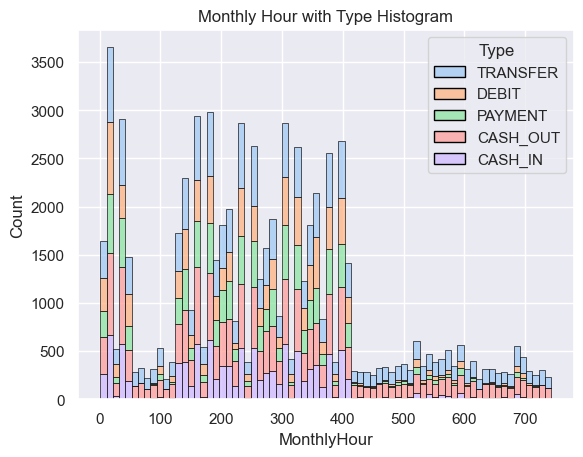

In [56]:
sns.histplot(data=data,x="MonthlyHour",hue="Type",palette="pastel",multiple="stack",edgecolor="black")
plt.title("Monthly Hour with Type Histogram")
plt.show()

In [57]:
print(f"Correlation Coefficient: {monthly_hour.corr(data.Type.map(dict(zip(data.Type.unique(),range(0,5))))):.2%}")

Correlation Coefficient: -5.13%


There is nearly smalll correlation between **Type** and **Monthly Hour**.

### **Amount** with **Monthly Hour**

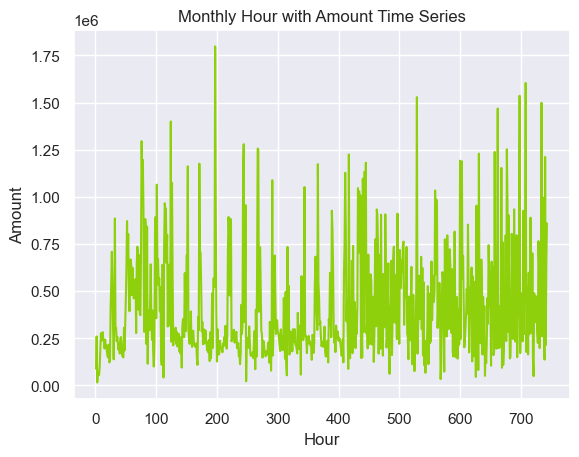

In [58]:
sns.lineplot(data=data.groupby("MonthlyHour",group_keys=False)[['Amount']].mean(),x="MonthlyHour",y="Amount",color="#8fd00d")
plt.title("Monthly Hour with Amount Time Series")
plt.xlabel("Hour")
plt.show()

We see that transaction **Amount** is bigger at the start and end of the month.

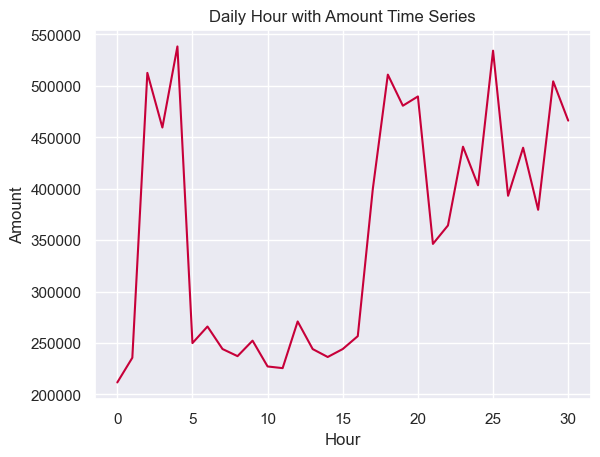

In [59]:
sns.lineplot(data=data.groupby((data['MonthlyHour'] // 24),group_keys=False)[['Amount']].mean(),x="MonthlyHour",y="Amount",color="#C70039")
plt.title("Daily Hour with Amount Time Series")
plt.xlabel("Hour")
plt.show()

We see that **Amount** of transactions is maximum at night while at day are too less.

In [60]:
print(f"Correlation Coefficient: {monthly_hour.corr(amount):.2%}")

Correlation Coefficient: 14.27%


There is small correlation between **Amount** and **Monthly Hour**.

### **Type** with **Amount**

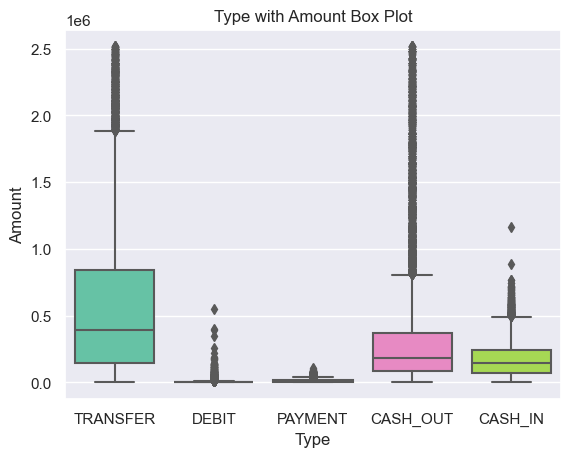

In [61]:
sns.boxplot(x='Type', y='Amount', data=data,palette="Set2",saturation=1)
plt.title('Type with Amount Box Plot')
plt.show()

We see that **Ammount** of transation is related to the its **type** for example when transaction is TRANSFER the amount is higher, not like DEBIT.

In [62]:
print(f"Correlation Coefficient: {amount.corr(data.Type.map(dict(zip(data.Type.unique(),range(0,5))))):.2%}")

Correlation Coefficient: -21.05%


There is -21% correlation between **Amount** and **Type**.

### **Sender Balance** with **Amount**

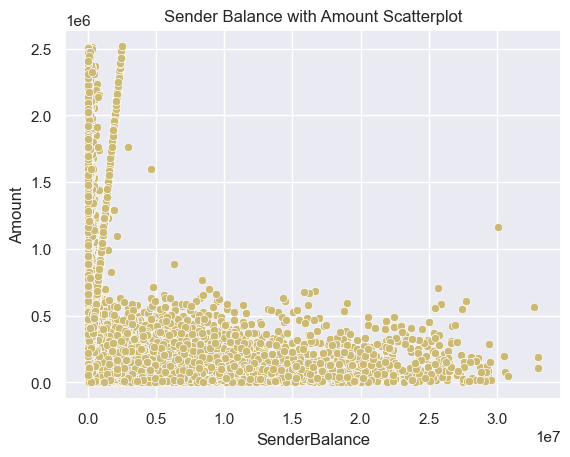

In [63]:
sns.scatterplot(data=data,x="SenderBalance",y="Amount",color=sns.color_palette(n_colors=20)[-2])
plt.title("Sender Balance with Amount Scatterplot")
plt.show()

We see that Higher **Balance of the Sender** doesnt always imply Higher **Amount** of transation.

In [64]:
print(f"Correlation Coefficient: {amount.corr(senderbalance):.2%}")

Correlation Coefficient: 100.00%


There is **perfect positive linear** correlation between Balance of Sender and Amount of the transaction. 

### **Receiver Balance** with **Amount**

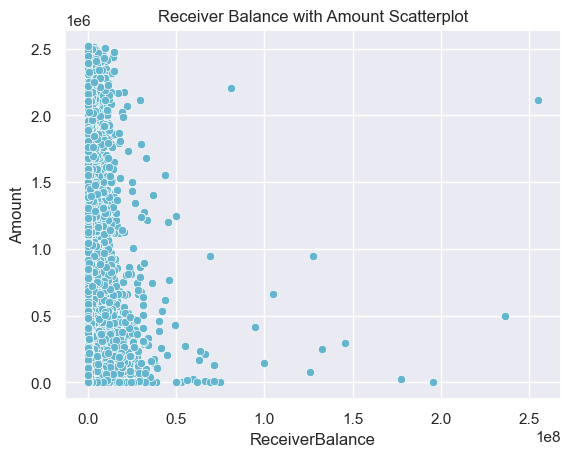

In [67]:
sns.scatterplot(data=data,x="ReceiverBalance",y="Amount",color=sns.color_palette(n_colors=20)[-1])
plt.title("Receiver Balance with Amount Scatterplot")
plt.show()

In [81]:
print(f"Correlation Coefficient: {amount.corr(receiverbalance):.2%}")

Correlation Coefficient: 5.75%


There is smalll correlation between **Balance of Receiver** and the **Amount of the transaction**. 

### **Sender Balance** with **Receiver Balance**

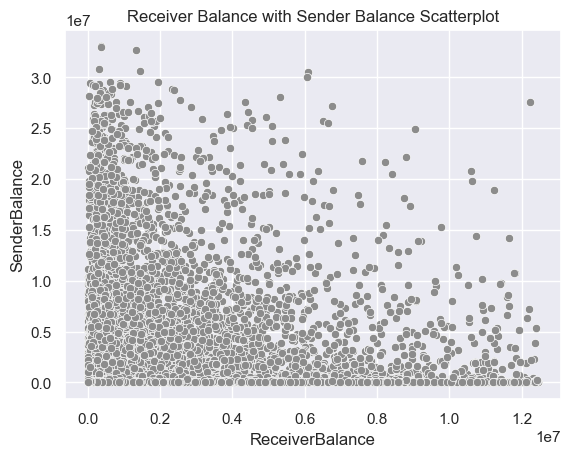

In [82]:
sns.scatterplot(data=data,x="ReceiverBalance",y="SenderBalance",color=sns.color_palette(n_colors=20)[-3])
plt.title("Receiver Balance with Sender Balance Scatterplot")
plt.show()

In [83]:
print(f"Correlation Coefficient: {senderbalance.corr(receiverbalance):.2%}")

Correlation Coefficient: 5.75%


Nearly same correlation as **ReceiverBalance** with **Amount** cause **Amount** and **SenderBalance** are highely correlation.

## Multivariate Analysis

### Features Interactions and Distributions

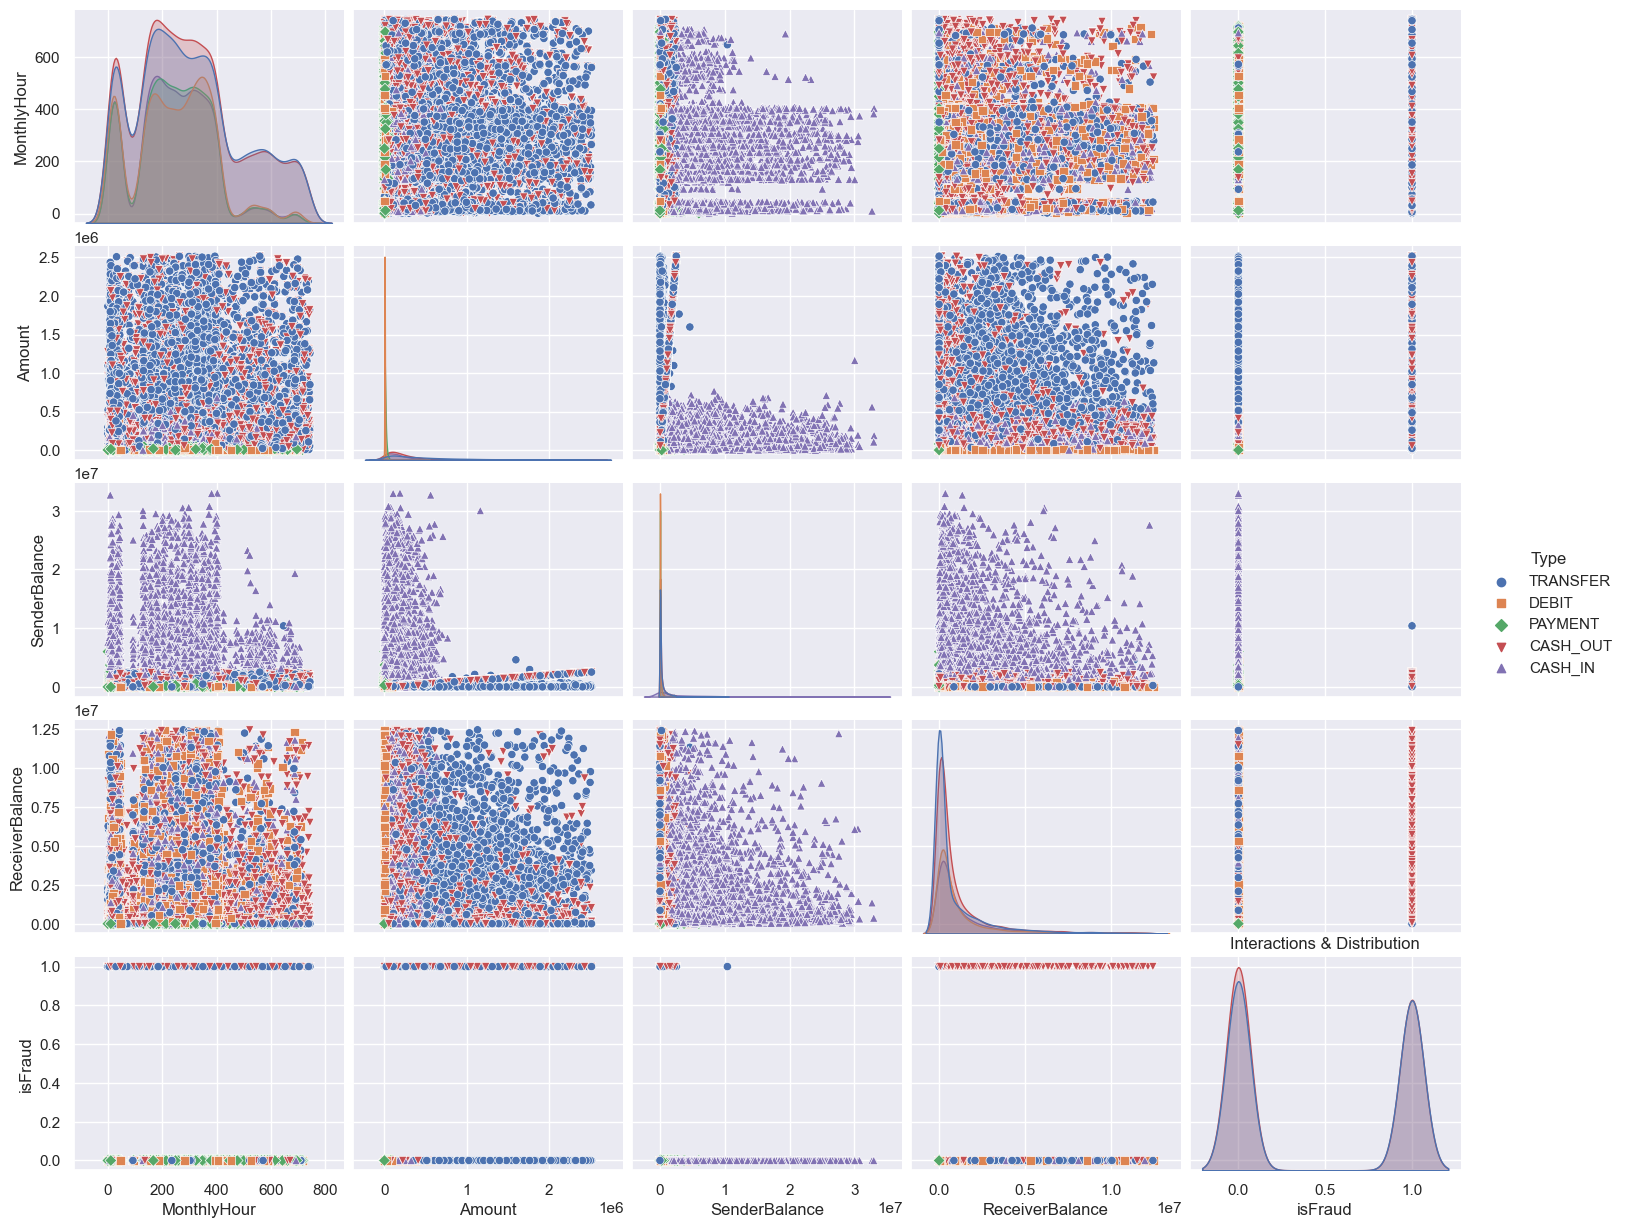

In [86]:
sns.pairplot(data=data,
    hue="Type",kind="scatter", 
    height=2.5, 
    aspect=1.2, 
    markers=["o", "s", "D", "v", "^"], 
    diag_kind="kde"
)
plt.title("Interactions & Distribution")
plt.show()

### Features Correlation

In [84]:
corrs = data.select_dtypes(include=np.number).corr()

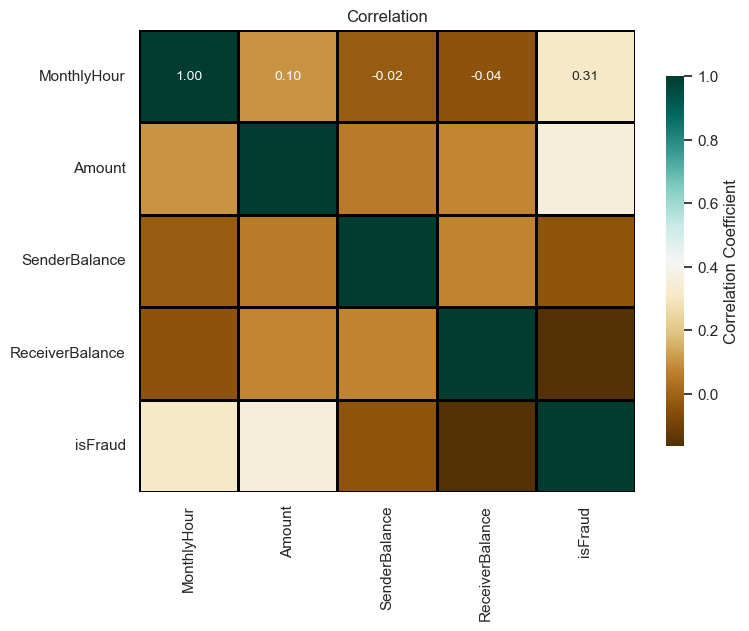

In [85]:
plt.figure(figsize=(8, 6))  
sns.heatmap(data=corrs,cmap="BrBG",annot=True,fmt=".2f",linewidths=2,linecolor="black",annot_kws={"size": 10},cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})
plt.title("Correlation")
plt.show()